In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import math
from scipy import stats
from scipy import integrate

# Survival counting process martingale example....


## *survival martingale counting processes formulas*


$$
N(t) = 1 (U \leq t, \delta = 1)
\\
Y(t) = 1 ( U \geq t)
$$

conditional on Y(t) = 1, $\lambda(t)*\Delta t $ is the expected change in the ocunting process N(t) at time t

Compensoator process A(t)=

$$
A(t) = \int_{0}^{t} \lambda(u) Y(u) du
$$ 

## *Simple martingale example using the exponential distribution*

$ T ~ Exp(\lambda) \\
G = censoring~process \sim  arbitrary! \\
\lambda(t) = \lambda $

Note lambda function =denotes hte hazard function, lambda symbol = just an arbitrary constant

In [19]:
#defining relevate probabiltiy function for the exponential

def f(x,l):
    #pdf
    return l*np.exp(-l*x)

def F(x,l):
    #cdf
    return 1-np.exp(-l*x)

def h(x,l):
    #hazard = constant for exponential
    return l

def S(x,l):
    #survival = 1-F(t)
    np.exp(-1*x)

def T(l):
    # samples form a exponential distribution with hazard = l

    X = np.random.uniform(0,1)

    #inverse cdf
    return -np.log(1-X)/l


#censroing functions - arbitrarily chosen....
def G1(l):
    #exponential with a slightly smaller hazard

    X = np.random.uniform(0,1)

    #inverse cdf
    return -np.log(1-X)/(l/1.05)

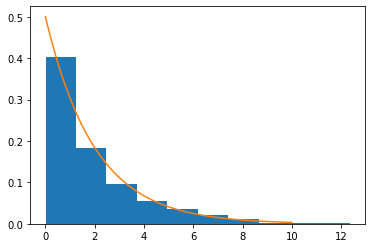

In [99]:
#defining lambda - arbitrary
l = 0.5

# sample of T
n = 1000
Ts = [T(l) for i in range(n)]
# sample of C
Cs = [G1(l) for i in range(n)]
# construct U and delta
Us = [min(i,j) for i,j in zip(Ts,Cs)]
ds = [1 if i<j else 0 for i,j in zip(Ts,Cs)]

t = np.linspace(0,10,100)
     
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(Ts, density = True)
ax.plot(t,[f(i,l) for i in t])

In [23]:
print("T:",Ts[0:5])
print("C:",Cs[0:5])
print("U:",Us[0:5])
print("d:",ds[0:5])

T: [4.111352608847576, 4.945137815661125, 0.3598800957579456, 1.6676687685128033, 0.23546952363229814]
C: [0.2342096567147057, 2.760510958149683, 0.40120541237160007, 0.5280027632983594, 3.0394848996133295]
U: [0.2342096567147057, 2.760510958149683, 0.3598800957579456, 0.5280027632983594, 0.23546952363229814]
d: [0, 0, 1, 0, 1]


## counting proceses N(t) and Y(t)

We can sample the probability space - to get sample paths of htese processes by inputting random variables T and C into them!!! - as they are functions form hte probabilty sapce onto the R - NOT WELL EXPLAINED BUT MAKES SENSE

We can feed hte stochastic process a litte omega - by inputting the 2 random variables T and C and then generating the sample path corresponding to this little omega

**Compensator process also take hazard function as an input**

# copied from above
$$
N(t) = 1 (U \leq t, \delta = 1)
\\
Y(t) = 1 ( U \geq t)
$$

conditional on Y(t) = 1, $\lambda(t)*\Delta t $ is the expected change in the ocunting process N(t) at time t

Compensoator process A(t)=

$$
A(t) = \int_{0}^{t} \lambda(u) Y(u) du
$$ 

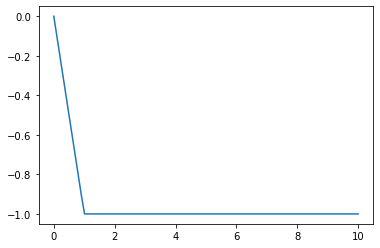

In [66]:
# N(t) sample path given Ui and di
def N(Ui,di,t):
    if Ui < t and di == 1:
        return 1
    else:
        return 0

def Y(Ui,di,t):
    #at risk indicator - as long as no observed failure or censoring = 1
    if Ui > t:
        return 1
    else:
        return 0

def A(Ui,di,l,t):
    #compensator process
    #return integrate.quad(lambda u: h(u,l)*Y(Ui,di,u),0,t)[0]

    # or equivalently for the exponential example
    return l*min(t,Ui)

def M(Ui,di,l,t):
    return N(Ui,di,t) - A(Ui,di,l,t)


#tesing it out
l = 1
Ui = 1
di = 0
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t,[M(Ui,di,l,i) for i in t])

## putting it all together

Examing the mean of hte proces

$$
M(t) = N(t) - A(t)
$$

for every fixed t, E(M(t)) = 0

Intuitively makes sense - as A(t) = expectation of N(t) and N(t) = N(t) itself
    So as M(t) goes down it always is expected to jump up 1 with probability equal to the deflection of A(t) - again terrible explained by makes sense

    

Mean: -0.00040655602941754314
STD: 0.0974516948215585
Number of observed events


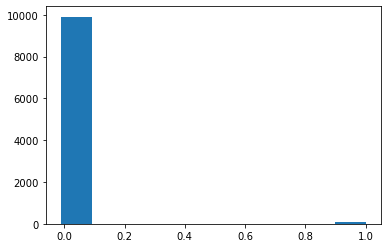

In [153]:
# generate our random variables

#defining lambda - arbitrary
l = 0.01

#sampling little omega - generating our random variables
# sample of T
n = 10000
Ts = [T(l) for i in range(n)]
# sample of C
Cs = [G1(l) for i in range(n)]
# construct U and delta
Us = [min(i,j) for i,j in zip(Ts,Cs)]
ds = [1 if i<j else 0 for i,j in zip(Ts,Cs)]

#choose an arbitraty t
t = 1
# generate M(t) for each little omega is our sample
Ms = [M(Ui,di,l,t) for Ui,di in zip(Us,ds)]

#plot the histogram
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(Ms)

print("Mean:",np.mean(Ms))
print("STD:",np.std(Ms))
print("Number of observed events")


# WOW IT WORKS